In [5]:
API_KEY = '97QT8RYDEG87X94W'
import requests
function = 'CURRENCY_EXCHANGE_RATE'
symbol = 'IBM'
interval = '1min'

fields = {'key': API_KEY, 'function': function, 'symbol': symbol, 'interval': interval}
response = requests.get("https://www.alphavantage.co", params=fields)
ts = TimeSeries(key=API_KEY, output_format='pandas')

from_currency='USD'
symbol = 'IBM'
interval = '1min'
data, meta_data = ts.get_intraday(symbol=symbol, interval=interval)

# Display the data
print(data.head())

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2024-02-09 19:59:00   186.11   186.11  186.00    186.00      200.0
2024-02-09 19:57:00   186.00   186.00  186.00    186.00        3.0
2024-02-09 19:48:00   186.08   186.19  185.99    186.19     4117.0
2024-02-09 19:46:00   186.21   186.21  186.20    186.20      403.0
2024-02-09 19:43:00   186.21   186.21  186.21    186.21       14.0


In [2]:
from alpha_vantage.timeseries import TimeSeries as av


from datetime import datetime
search_date = datetime.now().date().strftime('%Y-%m-%d')

class FundamentalData(av):

    """This class implements all the api calls to fundamental data
    """
    def __init__(self, *args, **kwargs):
        """
        Inherit AlphaVantage base class with its default arguments.
        """
        super(FundamentalData, self).__init__(*args, **kwargs)
        self._append_type = False
        if self.output_format.lower() == 'csv':
            raise ValueError("Output format {} is not compatible with the FundamentalData class".format(
                self.output_format.lower()))

    @av._output_format
    @av._call_api_on_func
    def get_company_overview(self, symbol):
        """
        Returns the company information, financial ratios, 
        and other key metrics for the equity specified. 
        Data is generally refreshed on the same day a company reports its latest 
        earnings and financials.

        Keyword Arguments:
            symbol:  the symbol for the equity we want to get its data
        """
        _FUNCTION_KEY = 'OVERVIEW'
        return _FUNCTION_KEY, None, None

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2024-02-09 19:59:00   188.54   188.54  188.52    188.53      888.0
2024-02-09 19:58:00   188.54   188.54  188.52    188.53      133.0
2024-02-09 19:57:00   188.56   188.56  188.52    188.53      376.0
2024-02-09 19:56:00   188.54   188.56  188.54    188.55     1681.0
2024-02-09 19:55:00   188.58   188.58  188.54    188.56       92.0


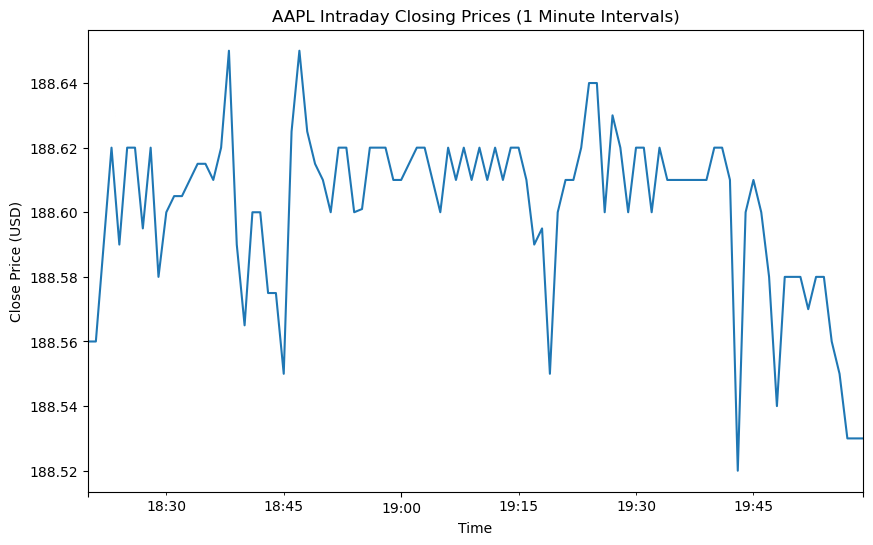

In [14]:
symbol = 'AAPL'
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries 

try:
    ts = TimeSeries(key=API_KEY, output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=symbol, interval='1min', outputsize='compact')
    
    # Display the data
    print(data.head())

    # Plot the closing prices
    plt.figure(figsize=(10, 6))
    data['4. close'].plot(title=f'{symbol} Intraday Closing Prices (1 Minute Intervals)')
    plt.xlabel('Time')
    plt.ylabel('Close Price (USD)')
    plt.show()

except ValueError as e:
    print(f"Error: {e}")

In [30]:
import requests
tickers = 'AAPL'
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

try:
    # Make the API request
    r = requests.get(url)

    # Check if the request was successful (status code 200)
    if r.status_code == 200:
        data = r.json()

        # Extract information from the first 10 feed items if available
        feed_items = data.get('feed', [])

        for i, feed_item in enumerate(feed_items[:10]):
            overall_sentiment_score = feed_item.get('overall_sentiment_score')
            category = feed_item.get('category_within_source')
            authors = feed_item.get('authors')
            summary = feed_item.get('summary')
            url = feed_item.get('url')

            print(f"\nEntry {i + 1}")
            print(f"Overall Sentiment Score for {tickers}: {overall_sentiment_score}")
            print(f"Overall Category for {tickers}: {category}")
            print(f"Overall authors for {tickers}: {authors}")
            print(f"Overall summary for {tickers}: {summary}")
            print(f"Overall url for {tickers}: {url}")

    else:
        print(f"Error: Unable to fetch data. Status code: {r.status_code}")

except Exception as e:
    print(f"Error: {e}")




Entry 1
Overall Sentiment Score for AAPL: 0.245496
Overall Category for AAPL: News
Overall authors for AAPL: ['Benzinga Neuro']
Overall summary for AAPL: It was an eventful week for Apple Inc. AAPL, with the spotlight on Apple's latest mixed reality headset, the Vision Pro. The week teemed with stories of a Tesla driver flouting road safety rules, German customs confiscating Vision Pros, and a lawsuit involving Apple CEO Tim Cook.
Overall url for AAPL: https://www.benzinga.com/news/24/02/37057472/from-tesla-drivers-to-german-customs-apple-vision-pro-shines-bright-this-week-in-appleverse

Entry 2
Overall Sentiment Score for AAPL: 0.238209
Overall Category for AAPL: General
Overall authors for AAPL: ['Benzinga Neuro']
Overall summary for AAPL: The week was a whirlwind of developments that underlined the increasing power of artificial intelligence and its influence on various industries. From an optimistic outlook for NVIDIA Corp. NVDA to the unlocking of ChatGPT's secret recipe, there w

In [27]:
import requests
tickers = 'AAPL'
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

In [28]:
data

{'items': '50',
 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.',
 'feed': [{'title': 'From Tesla Drivers To German Customs, Apple Vision Pro Shines Bright: This Week In Appleverse - Apple  ( NASDAQ:AAPL ) ',
   'url': 'https://www.benzinga.com/news/24/02/37057472/from-tesla-drivers-to-german-customs-apple-vision-pro-shines-bright-this-week-in-appleverse',
   'time_published': '20240211T055014',
   'authors': ['Benzinga Neuro'],
   'summary': "It was an eventful week for Apple Inc. AAPL, with the spotlight on Apple's latest mixed reality headset, the Vision Pro. The week teemed with stories of a Tesla driver flouting road safety rules, German customs confiscating Vision Pros, and a lawsuit involving Apple CEO Tim Cook.",
   'banner_image': 'https://cdn.benzinga.com/file